a.	Read the provided CSV file ‘data.csv’.
b.	https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing
c.	Show the basic statistical description about the data.
d.	Check if the data has null values.
i.	Replace the null values with the mean
e.	Select at least two columns and aggregate the data using: min, max, count, mean.
f.	Filter the dataframe to select the rows with calories values between 500 and 1000.
g.	Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
h.	Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
i.	Delete the “Maxpulse” column from the main df dataframe
j.	Convert the datatype of Calories column to int datatype.
k.	Using pandas create a scatter plot for the two columns (Duration and Calories).


         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244
    Duration  Pulse  Maxpulse  Calories
51        80    123       146     643.1
62       160    109       135     853.0
65       180     90       130     800.4
66       150    105       135     873.4
67       150    107       130     816.0
    Duration  Pulse  Maxpulse  Calories
65       180     90       130     800.4
70       150     97       129    1115.0
73       150     97       127     953.2
75        90     98       125     563.2
99        90     93       124     604.1


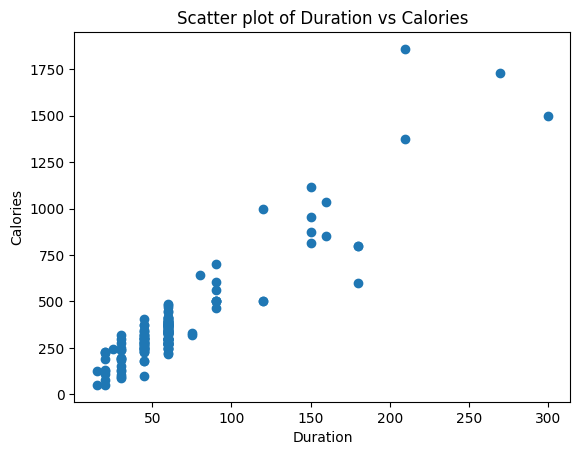

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('data.csv')

# Replace null values with the mean of the 'Calories' column
df['Calories'].fillna(df['Calories'].mean(), inplace=True)

# Perform basic aggregation on 'Duration' and 'Calories'
print(df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean']))

# Filter rows with Calories between 500 and 1000
filtered_df_500_1000 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print(filtered_df_500_1000.head())

# Filter rows with Calories > 500 and Pulse < 100
filtered_df_calories_pulse = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print(filtered_df_calories_pulse.head())

# Create a new dataframe excluding 'Maxpulse' and remove it from the original dataframe
df_modified = df.drop('Maxpulse', axis=1)
df.drop('Maxpulse', axis=1, inplace=True)

# Convert 'Calories' column to integer type
df['Calories'] = df['Calories'].astype(int)

# Plot scatter plot for 'Duration' and 'Calories'
plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Scatter plot of Duration vs Calories')
plt.show()


a)	Import the given “Salary_Data.csv”
b)	Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
c)	Train and predict the model.
d)	Calculate the mean_squared error
e)	Visualize both train and test data using scatter plot.


Training MSE: 36852948.76438455
Testing MSE: 21026037.329511296


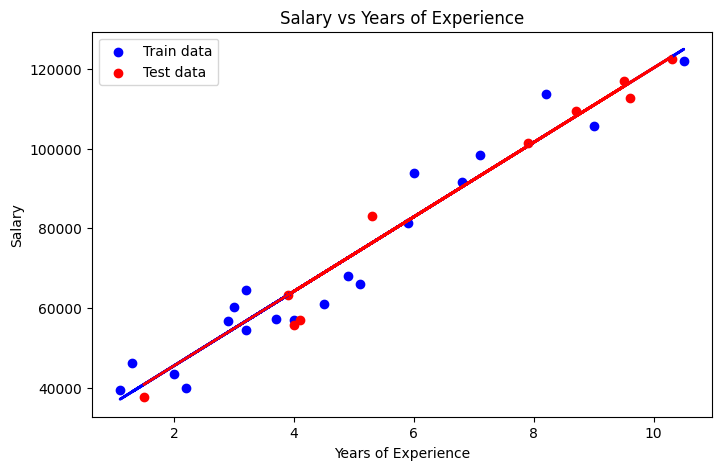

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# a) Load the dataset
data = pd.read_csv('Salary_Data.csv')

# b) Split the dataset into train and test sets (1/3 reserved for testing)
X = data[['YearsExperience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# c) Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the results
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# d) Calculate mean squared error for both train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

# e) Plot the train and test data with the regression line
plt.figure(figsize=(8, 5))

# Training data
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.plot(X_train, train_predictions, color='blue', linewidth=2)

# Test data
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_test, test_predictions, color='red', linewidth=2)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()
